In [ ]:
#import
from pyspark.sql import SparkSession
import os
import glob

# Initialize SparkSession
spark = SparkSession.builder.appName("TPC-DS Data Loading").config("spark.sql.catalogImplementation", "hive").getOrCreate()

In [ ]:
spark.catalog.listTables()

In [ ]:
#create all tables
with open(os.getcwd() + "/Create_database.sql", 'r') as file: # path/to/tpcds.sql
    db_string = file.read()

db_string = str.split(db_string, ";")
db_string = db_string[:-1]

for string in db_string:
    if string != '\n' or string != '':
        spark.sql(string)

In [ ]:
#load datas into tables
data_file = glob.glob(os.getcwd() + "/data/*")
for i in data_file:
    table_name = i.split("/")[-1].split(".")[0]
    if table_name != "dbgen_version":
        sql_command = "select * from " + table_name
        tmp=spark.sql(sql_command)
        #print(tmp)
        df = spark.read.schema(tmp.schema).csv( i, sep='|')
        df.write.mode("append").insertInto(table_name)
        print("Data from table" + table_name + "is inserted")

In [ ]:
#run queries
queries_files = glob.glob(os.getcwd() + "/queries/queries*")
for i in queries_files:
    with open( i , 'r') as file:
        db_string = file.read()
        
        #start time
        try:
            spark.sql(db_string)
        except:
            print( i + "doesn't work")
        #end time
    


In [ ]:
spark.sql("select count(*) from customer").show()


# Graphics

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# https://coolors.co/palettes/trending

# sf2_out1 --> Scale Factor of 2; output number 1
sf2_out1 = [random.uniform(5, 10) for _ in range(99)]
sf2_out2 = [random.uniform(5, 10) for _ in range(99)]
sf2_out3 = [random.uniform(5, 10) for _ in range(99)]
sf2_out4 = [random.uniform(5, 10) for _ in range(99)]
sf2_out5 = [random.uniform(5, 10) for _ in range(99)]

sf5_out1 = [random.uniform(15, 30) for _ in range(99)]
sf5_out2 = [random.uniform(15, 30) for _ in range(99)]
sf5_out3 = [random.uniform(15, 10) for _ in range(99)]
sf5_out4 = [random.uniform(15, 10) for _ in range(99)]
sf5_out5 = [random.uniform(15, 10) for _ in range(99)]

sf20_out1 = [random.uniform(50, 100) for _ in range(99)]
sf20_out2 = [random.uniform(50, 100) for _ in range(99)]
sf20_out3 = [random.uniform(50, 100) for _ in range(99)]
sf20_out4 = [random.uniform(50, 100) for _ in range(99)]
sf20_out5 = [random.uniform(50, 100) for _ in range(99)]

In [2]:
def avg_calculator(list1, list2, list3, list4, list5):
    list_avg = np.add(list1, list2)
    list_avg = np.add(list_avg, list3)
    list_avg = np.add(list_avg, list4)
    list_avg = np.add(list_avg, list5)
    return list_avg/5

def std_calculator(list_1, list_2, list_3, list_4, list_5):
    list_sd = []
    for i in np.arange(0,99):
        sd = [list_1[i], list_2[i], list_3[i], list_4[i], list_5[i]]
        list_sd.append(np.std(sd))
    return list_sd

In [3]:
def avg_order(list_1, list_2, list_3, list_4, list_5):

    list_std = avg_calculator(list_1, list_2, list_3, list_4, list_5)

    indexed_vector = [(value, index) for index, value in enumerate(list_std)]

    # Sort the list in decreasing order while keeping track of original indices
    sorted_vector = sorted(indexed_vector, key=lambda x: x[0], reverse=True)

    # Extract the sorted values and their original indices
    # list_std_ord, indices = zip(*sorted_vector)

    return sorted_vector

def std_order(list_1, list_2, list_3, list_4, list_5):

    list_std = std_calculator(list_1, list_2, list_3, list_4, list_5)

    indexed_vector = [(value, index) for index, value in enumerate(list_std)]

    # Sort the list in decreasing order while keeping track of original indices
    sorted_vector = sorted(indexed_vector, key=lambda x: x[0], reverse=True)

    # Extract the sorted values and their original indices
    # list_std_ord, indices = zip(*sorted_vector)

    return sorted_vector

In [4]:
sf2_avg = avg_order(sf2_out1, sf2_out2, sf2_out3, sf2_out4, sf2_out5)
sf5_avg = avg_order(sf5_out1, sf5_out2, sf5_out3, sf5_out4, sf5_out5)
sf20_avg = avg_order(sf20_out1, sf20_out2, sf20_out3, sf20_out4, sf20_out5)

sf2_std = std_order(sf2_out1, sf2_out2, sf2_out3, sf2_out4, sf2_out5)
sf5_std = std_order(sf5_out1, sf5_out2, sf5_out3, sf5_out4, sf5_out5)
sf20_std = std_order(sf20_out1, sf20_out2, sf20_out3, sf20_out4, sf20_out5)

In [5]:
def small_plot(lis, subplot_num, sf, avgOrStd):

    # Plot the three line plots
    vec, _ = zip(*lis)

    plt.subplot(3, 2, subplot_num)

    # CHECK LATER!! (sf probably will have different values)

    if(sf == 1):
        plt.plot(np.arange(1,100), vec, color='#f77f00')
    elif(sf == 2):
        plt.plot(np.arange(1,100), vec, color= '#d62828')
    elif(sf == 3):
        plt.plot(np.arange(1,100), vec, color= '#003049')
    else:
        ValueError("sf has to be one of the scale factors")

    if(avgOrStd == 0):
        plt.title(f'Average execution time for SF = {sf}')
    if(avgOrStd == 1):
        plt.title(f'Average std of execution time for SF = {sf}')


In [6]:
def plotter(avg_1, avg_2, avg_3, std_1, std_2, std_3):
    
    fig = plt.figure(figsize=(15, 10))

    small_plot(avg_1, 1, 1, 0)
    small_plot(std_1, 6, 2, 1)
    small_plot(avg_2, 3, 3, 0)
    small_plot(std_2, 2, 1, 1)
    small_plot(avg_3, 5, 2, 0)
    small_plot(std_3, 4, 3, 1)

    plt.tight_layout()
    plt.show()

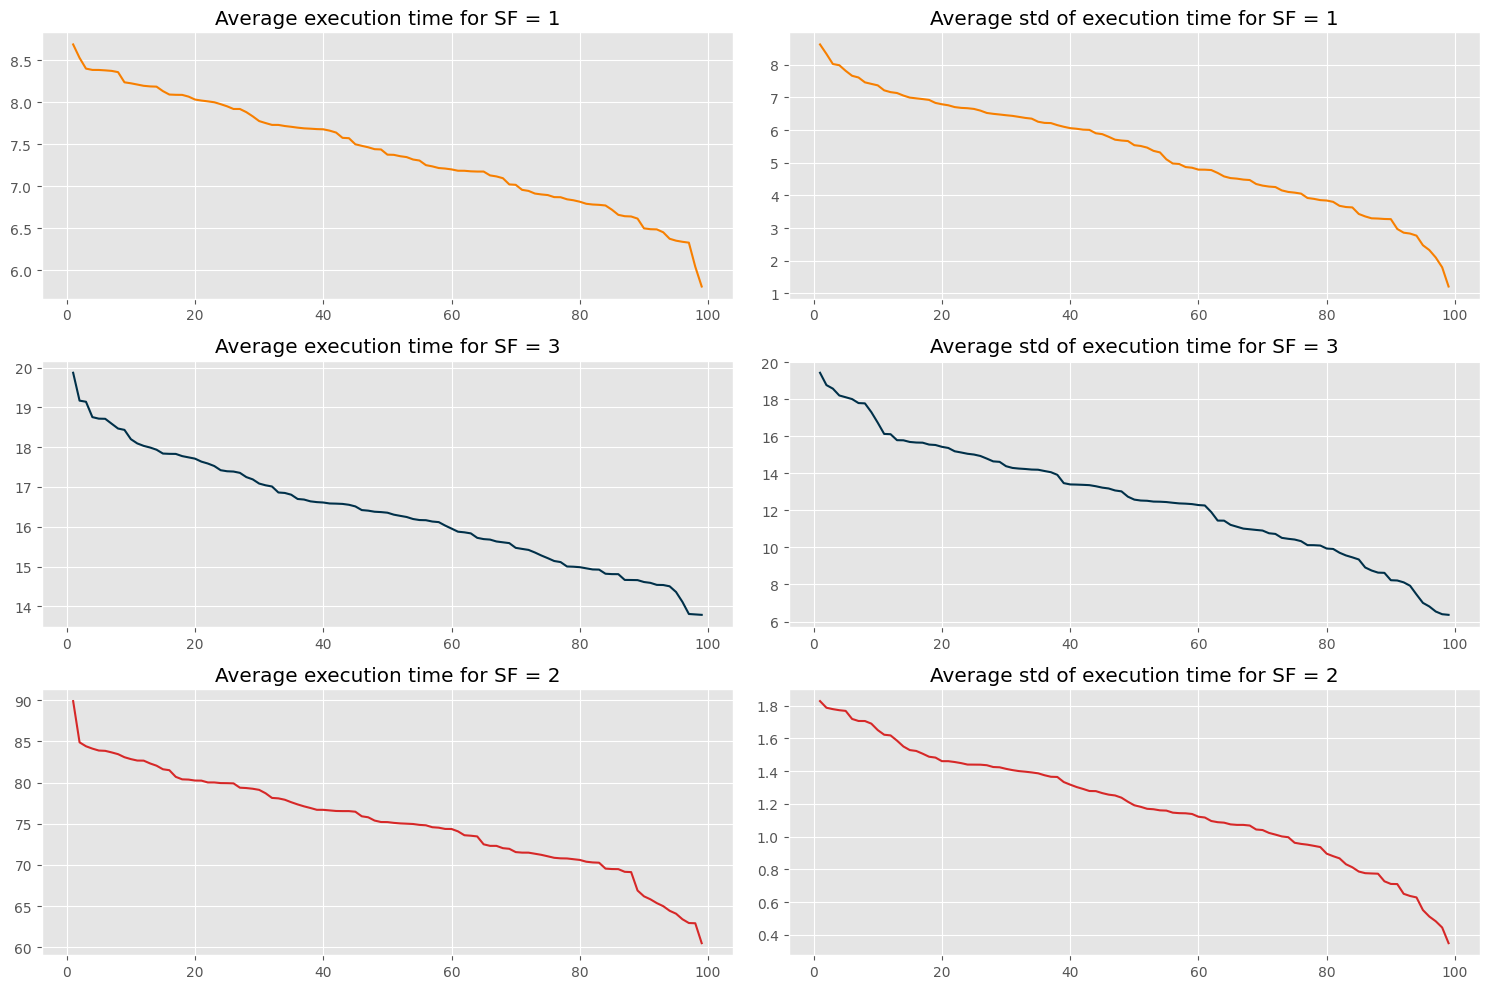

In [7]:
plotter(sf2_avg, sf5_avg, sf20_avg, sf2_std, sf5_std, sf20_std)

From now on all the code is just to produce a nice output w/ relevant statistics

In [8]:
sf2_avg = avg_order(sf2_out1, sf2_out2, sf2_out3, sf2_out4, sf2_out5)
sf5_avg = avg_order(sf5_out1, sf5_out2, sf5_out3, sf5_out4, sf5_out5)
sf20_avg = avg_order(sf20_out1, sf20_out2, sf20_out3, sf20_out4, sf20_out5)

sf2_std = std_order(sf2_out1, sf2_out2, sf2_out3, sf2_out4, sf2_out5)
sf5_std = std_order(sf5_out1, sf5_out2, sf5_out3, sf5_out4, sf5_out5)
sf20_std = std_order(sf20_out1, sf20_out2, sf20_out3, sf20_out4, sf20_out5)

placeh_table = np.zeros((99,7))
index = list(np.arange(1,100))
placeh_table[:,0] = index

In [9]:
def placeh_filler(placeh, vec, ref):
    # values, indices = zip(*vec[:10])
    for (value,index) in vec[:10]:
        placeh[index,ref] = round(value,3)
    return placeh

In [10]:
placeh_table = placeh_filler(placeh_table, sf2_avg, 1)
placeh_table = placeh_filler(placeh_table, sf5_avg, 2)
placeh_table = placeh_filler(placeh_table, sf20_avg, 3)
placeh_table = placeh_filler(placeh_table, sf2_std, 4)
placeh_table = placeh_filler(placeh_table, sf5_std, 5)
placeh_table = placeh_filler(placeh_table, sf20_std, 6)

row_sums = np.sum(placeh_table[:,1:], axis=1)
placeh_table = placeh_table[row_sums != 0,:]

In [11]:
sf2_avg = round(np.median(list(avg_calculator(sf2_out1, sf2_out2, sf2_out3, sf2_out4, sf2_out5))),3)
sf5_avg = round(np.median(list(avg_calculator(sf5_out1, sf5_out2, sf5_out3, sf5_out4, sf5_out5))),3)
sf20_avg = round(np.median(list(avg_calculator(sf20_out1, sf20_out2, sf20_out3, sf20_out4, sf20_out5))),3)

sf2_std = round(np.quantile(list(std_calculator(sf2_out1, sf2_out2, sf2_out3, sf2_out4, sf2_out5)),0.75),3)
sf5_std = round(np.quantile(list(std_calculator(sf5_out1, sf5_out2, sf5_out3, sf5_out4, sf5_out5)),0.75),3)
sf20_std = round(np.quantile(list(std_calculator(sf20_out1, sf20_out2, sf20_out3, sf20_out4, sf20_out5)),0.75),3)

placeh_vec1 = np.array(['Median', sf2_avg, sf5_avg, sf20_avg, sf2_std, sf5_std, sf20_std])
placeh_vec2 = np.array(['3d Quartile', sf2_avg, sf5_avg, sf20_avg, sf2_std, sf5_std, sf20_std])

In [12]:
placeh_table = np.vstack((placeh_vec1, placeh_vec2, placeh_table))

In [13]:
print(placeh_table)

[['Median' '7.377' '16.353' '75.2' '1.44' '6.621' '14.975']
 ['3d Quartile' '7.377' '16.353' '75.2' '1.44' '6.621' '14.975']
 ['1.0' '0.0' '0.0' '0.0' '0.0' '7.812' '0.0']
 ['4.0' '0.0' '18.712' '0.0' '0.0' '8.621' '0.0']
 ['7.0' '0.0' '18.468' '0.0' '0.0' '8.021' '0.0']
 ['8.0' '0.0' '0.0' '0.0' '0.0' '0.0' '18.762']
 ['9.0' '8.227' '0.0' '0.0' '1.772' '0.0' '0.0']
 ['10.0' '8.386' '0.0' '84.876' '0.0' '0.0' '0.0']
 ['12.0' '0.0' '0.0' '0.0' '1.706' '0.0' '0.0']
 ['13.0' '0.0' '0.0' '0.0' '1.768' '0.0' '0.0']
 ['15.0' '0.0' '0.0' '0.0' '1.828' '0.0' '0.0']
 ['16.0' '8.381' '0.0' '0.0' '1.69' '0.0' '0.0']
 ['18.0' '0.0' '0.0' '0.0' '0.0' '7.46' '0.0']
 ['20.0' '8.36' '0.0' '0.0' '0.0' '0.0' '0.0']
 ['21.0' '0.0' '0.0' '0.0' '0.0' '0.0' '18.571']
 ['22.0' '0.0' '0.0' '84.4' '0.0' '0.0' '0.0']
 ['23.0' '0.0' '19.169' '0.0' '0.0' '8.331' '0.0']
 ['24.0' '0.0' '18.434' '82.842' '0.0' '0.0' '0.0']
 ['26.0' '0.0' '19.87' '0.0' '0.0' '7.661' '17.303']
 ['27.0' '0.0' '0.0' '0.0' '0.0' '0.0' '1